## TP Webscraping

On considère les données du site https://www.hubertiming.com/results/2017GPTR10K des résultats d'une course de 10km qui a eu lieu à Hillsboro, en Oregon, en juin 2017, on va essayer d'analyser les performances des coureurs de 10 km..


**Objectifs du TD:**

1. Extraction de données à partir du site web en utilisant le module Beautiful Soup .
2. Manipulation et nettoyage des données en utilisant la bibliothèque Pandas .
3. Visualisation des données à l'aide de la bibliothèque Matplotlib et Seaborn.


Suivre les étapes de ce notebook pour faire la récupérer les données, les nettoyer , les préparer pour l'analyse, calculer des statistiques, créer des graphiques et interpréter les résultats. 



### 1- Importer les librariries
    
* pour le webscraping et la collecte de données à pratir du web: 
    - requests pour récupérer le contenu HTML d'une page web.
    - BeautifulSoup  pour extraire des données de fichiers HTML et XML.

* pour l'analyse et l'exploitation des données
    - pandas pour la manipulation et l'analyse de données.
    - numpy pour le calcul numérique.
    - matplotlib et seaborn pour créer des visualisations.

RQ:  %matplotlib inline permet d'afficher directement les visualisations dans le notebook Jupyter.


In [1]:
# Libraries pour le webscraping
import requests 
from bs4 import BeautifulSoup

#Libraries pour l'analyse de données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



### 2- Récupérer le contenu HTML avec Requests

On considère l'URL : url = http://www.hubertiming.com/results/2017GPTR10K



In [2]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = requests.get(url)
url

'http://www.hubertiming.com/results/2017GPTR10K'

### 3-Analyse du HTML avec BeautifulSoup

Obtenir le HTML de la page n'est que la première étape. 

La seconde consiste à créer un objet Beautiful Soup à partir du HTML. 

Cela se fait en passant le HTML à la fonction BeautifulSoup()qui prend le texte HTML brut et le transformer en objets Python. Le deuxième argument est le parseur HTML (lxml,html.parser..)


In [4]:
soup = BeautifulSoup(html.text)
type(soup)


bs4.BeautifulSoup

#### Prendre en main le contenu de la page, title, text..

Rappel: Ne pas oublier qu'il faut utiliser l'inspecteur de votre navigateur  => afficher le HTML de la page web en faisant un clic droit n'importe où sur la page web et en sélectionnant "Inspecter".


Voici à quoi ressemble le résultat.

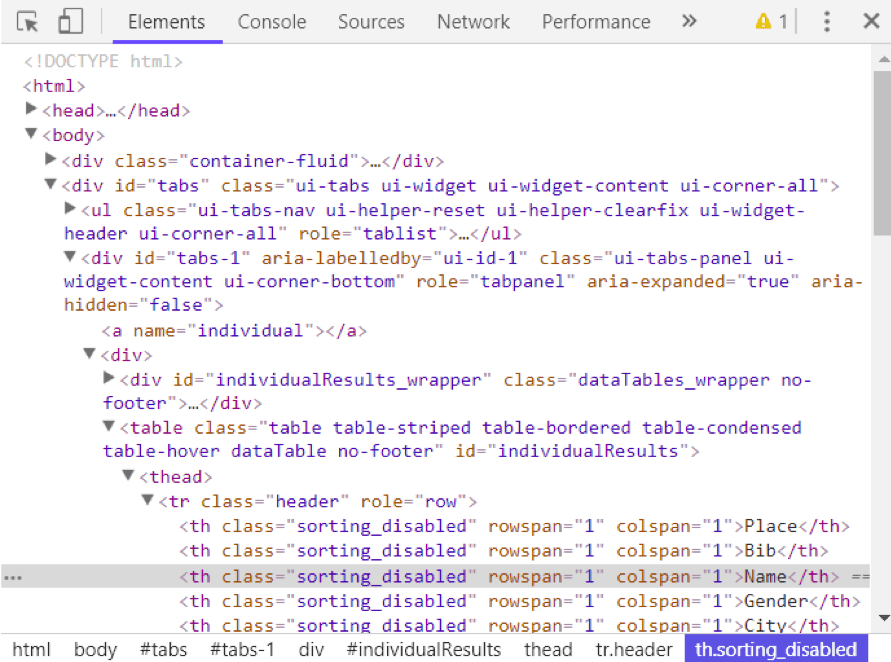

In [122]:
# Get the title
title = soup.title
print(title)


<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


In [123]:
# Print out the text
text = soup.get_text()
#print(soup.text)


* utiliser la méthode find_all() de soup pour extraire des balises HTML utiles à l'intérieur d'une page web. 

Des exemples de balises utiles comprennent <a> 

    pour les liens hypertextes, 
    
    <table> pour les tableaux, 
        
        <tr> pour les lignes de tableau, 
            <th> pour les en-têtes de tableau, 
                et <td> pour les cellules de tableau. 

In [124]:
#extraire tous les liens hypertextes à l'intérieur de la page web.
all_links= soup.find_all('a')
all_links

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 5K Individual</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 5K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 10K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>,
 <a id="individual" name="individual"></a>,
 <a data-url="/results/2017GPTR10K" href="#tabs-1" id="rootTab" style="font-size: 18px">10K Results</a>,
 <a href="https://www.hubertiming.com/"><img

In [125]:
all_links = soup.find_all("a")
all_links2=[]
for link in all_links:
    print(link.get("href"))
    all_links2.append(link.get("href"))


mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


* Analyser et comprendre le code ci dessous 

In [9]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)



[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 1:42:10, ]


In [130]:
print('clean2 :' , type(clean2)) 

clean2 : <class 'str'>


#### Construire des dataframes à partir du HTML 

* convertir la liste en un dataframe df1 et afficher les 10 premières lignes du df

In [10]:
df = pd.DataFrame(list_rows)
df.head(10)


,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, \r\n\r\n JARED WIL..."
6,"[2, 573, \r\n\r\n NATHAN A ..."
7,"[3, 687, \r\n\r\n FRANCISCO..."
8,"[4, 623, \r\n\r\n PAUL MORR..."
9,"[5, 569, \r\n\r\n DEREK G O..."


In [41]:
export_csv = df.to_csv(r"file.csv", index = None, header = True)

In [42]:
df=pd.read_csv('file.csv')
df.head()

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]


* EXtraire avec find_all les noms des colonnes du tableau (headers) du tableau et convertir  le résultat dans un datframe df2



In [11]:
col_labels = soup.find_all('th')
col_labels

[<th>Place</th>,
 <th>Bib</th>,
 <th>Name</th>,
 <th>Gender</th>,
 <th>City</th>,
 <th>State</th>,
 <th>Time</th>,
 <th>Gun Time</th>,
 <th>Team</th>]

In [12]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(type(all_header))


<class 'list'>


In [19]:
#all_header=[]
#for h in col_labels:
    #h = re.sub("<th>|</th>", "", str(h))
    #h=h.get_text()
 #   h=h.text
    
    #print(h)
  #  all_header.append(h)
#all_header    

['Place', 'Bib', 'Name', 'Gender', 'City', 'State', 'Time', 'Gun Time', 'Team']

In [ ]:
#col_labels=[]
#for p in soup.find_all('th'):
    # Nous récupérons uniquement le contenu ==> .text
 #   col_labels.append(p.text)
    
    
#df2=pd.DataFrame(col_labels)
#print(col_labels)
#print(df2)

In [20]:
#col_labels = soup.find_all('th')
#col_labels = [x.text.strip("<th>") for x in col_labels]
#col_labels


['Place', 'Bib', 'Name', 'Gender', 'City', 'State', 'Time', 'Gun Time', 'Team']

In [25]:
#df2 = pd.DataFrame(columns=col_labels)
#df2

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team


In [13]:
df2 = pd.DataFrame(all_header)
df2.head()


,0
0,"[Place, Bib, Name, Gender, City, State, Time, ..."


### Nettoyage et Manipulation de données

* Nettoyage du dataframe: 

####  Diviser la colonne "0" en plusieurs colonnes 

en se basant sur le séparateur virgule. => indication: vous pouvez utiliser la méthode str.split()



In [14]:
df.head(10)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, \r\n\r\n JARED WIL..."
6,"[2, 573, \r\n\r\n NATHAN A ..."
7,"[3, 687, \r\n\r\n FRANCISCO..."
8,"[4, 623, \r\n\r\n PAUL MORR..."
9,"[5, 569, \r\n\r\n DEREK G O..."


In [14]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)


,0,1,2,3,4,5,6,7,8
0,[],None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None
5,[1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,[2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,[3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,[4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,[5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


####  enlever tous les crochets [  ] 

=> indication: vous pouvez utiliser str.strip('[')


In [17]:
#df1[0] = df1[0].str.strip('[')
#df1.head(10)


,0,1,2,3,4,5,6,7,8
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [17]:
for i in range(9):
    df1[i]=df1[i].str.strip('[|]')
    
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,,None,None,None,None,None,None,None,None
1,Finishers:,577,None,None,None,None,None,None,None
2,Male:,414,None,None,None,None,None,None,None
3,Female:,163,None,None,None,None,None,None,None
4,,None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


#### Concaténer les 2 dataframes df1 et df2

In [51]:
df2.head()

,0
0,"['Place', 'Bib', 'Name', 'Gender', 'City', 'St..."


In [18]:
df3 = df2[0].str.split(',', expand=True)
df3.head()


,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]


In [52]:
df1.head()

,0,1,2,3,4,5,6,7,8
0,,None,None,None,None,None,None,None,None
1,Finishers:,577,None,None,None,None,None,None,None
2,Male:,414,None,None,None,None,None,None,None
3,Female:,163,None,None,None,None,None,None,None
4,,None,None,None,None,None,None,None,None


In [53]:
#?pd.concat

In [19]:
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)


,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,,None,None,None,None,None,None,None,None
1,Finishers:,577,None,None,None,None,None,None,None
2,Male:,414,None,None,None,None,None,None,None
3,Female:,163,None,None,None,None,None,None,None
4,,None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,


In [201]:
df4.info()
df4.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 581
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       583 non-null    object
 1   1       581 non-null    object
 2   2       578 non-null    object
 3   3       578 non-null    object
 4   4       578 non-null    object
 5   5       578 non-null    object
 6   6       578 non-null    object
 7   7       578 non-null    object
 8   8       578 non-null    object
dtypes: object(9)
memory usage: 45.5+ KB


(583, 9)

#### Assigner les bons noms des colonnes du dataframe

In [20]:
#Affecter des noms aux colonnes et supprimer la première ligne
df5 = df4.rename(columns=df4.iloc[0])
df5.head(10)


,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,,None,None,None,None,None,None,None,None
1,Finishers:,577,None,None,None,None,None,None,None
2,Male:,414,None,None,None,None,None,None,None
3,Female:,163,None,None,None,None,None,None,None
4,,None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,


In [21]:
df5 = df5.drop(df5.index[0])
df5.head(10)


,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
1,Finishers:,577,None,None,None,None,None,None,None
2,Male:,414,None,None,None,None,None,None,None
3,Female:,163,None,None,None,None,None,None,None
4,,None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...
10,6,642,\r\n\r\n JONATHON TRAN\r\n...,M,PORTLAND,OR,39:49,39:55,


In [22]:
df5.rename(columns={'[Place': 'Place'},inplace=True)
df5.rename(columns={' Team]': 'Team'},inplace=True)
df5.head()


,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
1,Finishers:,577,None,None,None,None,None,None,None
2,Male:,414,None,None,None,None,None,None,None
3,Female:,163,None,None,None,None,None,None,None
4,,None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,


In [25]:
df5 = df5.drop(df5.index[:4]).reset_index(drop=True)
df5.head()

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
0,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,
1,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
2,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,
3,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,
4,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [26]:
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Place      577 non-null    object
 1    Bib       577 non-null    object
 2    Name      577 non-null    object
 3    Gender    577 non-null    object
 4    City      577 non-null    object
 5    State     577 non-null    object
 6    Time      577 non-null    object
 7    Gun Time  577 non-null    object
 8   Team       577 non-null    object
dtypes: object(9)
memory usage: 40.7+ KB


(577, 9)

La table a 577 lignes et 9 colonnes. 

#### supprimer toutes les lignes qui contiennent des valeurs manquantes.

In [27]:
df6 = df5.dropna(axis=0, how='any')
df6

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
0,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,
1,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
2,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,
3,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,
4,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...
...,...,...,...,...,...,...,...,...,...
572,573,273,\r\n\r\n RACHEL L VANEY\r\...,F,OTHER,OR,1:38:17,1:38:34,
573,574,467,\r\n\r\n ROHIT B DSOUZA\r\...,M,PORTLAND,OR,1:38:31,1:40:32,\n\r\n INTEL TEAM ...
574,575,471,\r\n\r\n CENITA D'SOUZA\r\...,F,PORTLAND,OR,1:38:32,1:40:34,
575,576,338,\r\n\r\n PRANAVI APPANA\r\...,F,HILLSBORO,OR,1:40:47,1:42:01,


### Analyse de données et visualisations

#### quelle est la durée moyenne de course (en minutes) pour les coureurs ?

indication: convertir la colonne "Gun Time" en minutes . 

In [28]:
df6.describe()

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
count,577,577,577,577,577,577,577,577,577
unique,577,577,576,2,20,9,516,508,24
top,1,814,\r\n\r\n NO NAME PLS EMAIL...,M,PORTLAND,OR,55:00,50:45,
freq,1,1,2,414,206,551,5,3,497


In [29]:
df6.head()

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
0,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,
1,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
2,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,
3,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,
4,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [25]:
# utiliser une boucle for pour convertir la colonne Gun Time en minutes
time_list = df6.iloc[:,-2].tolist()
time_list

[' 36:24',
 ' 36:45',
 ' 37:48',
 ' 38:37',
 ' 39:24',
 ' 39:55',
 ' 40:17',
 ' 40:09',
 ' 40:24',
 ' 40:25',
 ' 40:40',
 ' 40:42',
 ' 40:50',
 ' 41:13',
 ' 41:24',
 ' 41:49',
 ' 42:02',
 ' 42:28',
 ' 42:34',
 ' 42:48',
 ' 42:52',
 ' 42:58',
 ' 43:04',
 ' 43:36',
 ' 43:30',
 ' 43:43',
 ' 44:01',
 ' 43:52',
 ' 43:51',
 ' 43:53',
 ' 43:52',
 ' 43:52',
 ' 44:10',
 ' 44:12',
 ' 44:18',
 ' 44:17',
 ' 44:29',
 ' 45:09',
 ' 45:10',
 ' 44:46',
 ' 45:01',
 ' 45:46',
 ' 45:09',
 ' 45:22',
 ' 45:30',
 ' 45:18',
 ' 45:35',
 ' 45:32',
 ' 45:26',
 ' 45:24',
 ' 45:53',
 ' 45:34',
 ' 45:42',
 ' 46:31',
 ' 46:17',
 ' 45:59',
 ' 46:02',
 ' 45:57',
 ' 46:05',
 ' 46:07',
 ' 46:16',
 ' 46:39',
 ' 46:28',
 ' 46:33',
 ' 46:58',
 ' 48:01',
 ' 47:02',
 ' 46:53',
 ' 46:57',
 ' 47:06',
 ' 47:00',
 ' 47:49',
 ' 46:56',
 ' 47:09',
 ' 48:54',
 ' 47:32',
 ' 47:21',
 ' 47:10',
 ' 47:37',
 ' 47:13',
 ' 47:41',
 ' 47:30',
 ' 48:28',
 ' 47:45',
 ' 47:36',
 ' 47:59',
 ' 47:55',
 ' 48:12',
 ' 48:01',
 ' 48:03',
 ' 48:09',

In [31]:

time_mins = []
for i in time_list:
    t = i.split(':')
   #print(t)
    if len(t) == 3:
        h,m,s = map(int, t)
        math = round((int(h) * 3600 + int(m) * 60 + int(s))/60,2)
    elif len(t)==2:
        m,s = map(int, t)
        math = round((int(m) * 60 + int(s))/60,2)
    
    time_mins.append(math)
print(time_mins)


[36.4, 36.75, 37.8, 38.62, 39.4, 39.92, 40.28, 40.15, 40.4, 40.42, 40.67, 40.7, 40.83, 41.22, 41.4, 41.82, 42.03, 42.47, 42.57, 42.8, 42.87, 42.97, 43.07, 43.6, 43.5, 43.72, 44.02, 43.87, 43.85, 43.88, 43.87, 43.87, 44.17, 44.2, 44.3, 44.28, 44.48, 45.15, 45.17, 44.77, 45.02, 45.77, 45.15, 45.37, 45.5, 45.3, 45.58, 45.53, 45.43, 45.4, 45.88, 45.57, 45.7, 46.52, 46.28, 45.98, 46.03, 45.95, 46.08, 46.12, 46.27, 46.65, 46.47, 46.55, 46.97, 48.02, 47.03, 46.88, 46.95, 47.1, 47.0, 47.82, 46.93, 47.15, 48.9, 47.53, 47.35, 47.17, 47.62, 47.22, 47.68, 47.5, 48.47, 47.75, 47.6, 47.98, 47.92, 48.2, 48.02, 48.05, 48.15, 48.15, 48.15, 48.1, 49.05, 48.33, 48.45, 49.1, 48.93, 48.67, 48.97, 49.05, 48.63, 49.6, 48.9, 48.93, 49.23, 49.2, 49.25, 49.08, 48.88, 49.9, 49.37, 50.02, 49.62, 49.43, 49.48, 49.72, 50.05, 49.87, 50.55, 49.95, 49.75, 50.07, 50.83, 50.57, 51.37, 51.48, 51.08, 51.48, 50.75, 50.75, 50.72, 50.48, 50.65, 50.75, 51.02, 51.45, 52.83, 50.95, 51.28, 50.97, 50.95, 50.97, 51.68, 51.42, 51.3

In [35]:
df6['Runner_mins'] = time_mins
df6.head()


C:\Users\manel\AppData\Local\Temp\ipykernel_1460\2136044036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Runner_mins'] = time_mins


,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team,Runner_mins
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,,36.40
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...,36.75
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,,37.80
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,,38.62
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...,39.40


In [33]:
df6.describe()

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
count,577,577,577,577,577,577,577,577,577
unique,577,577,576,2,20,9,516,508,24
top,1,814,\r\n\r\n NO NAME PLS EMAIL...,M,PORTLAND,OR,55:00,50:45,
freq,1,1,2,414,206,551,5,3,497


In [36]:
df6.describe()

,Runner_mins
count,577.000000
mean,60.631612
std,12.110718
min,36.400000
25%,51.450000
50%,59.900000
75%,68.000000
max,102.170000


In [258]:
df7.describe(include=[np.number])


,Runner_mins
count,577.000000
mean,60.631612
std,12.110718
min,36.400000
25%,51.450000
50%,59.900000
75%,68.000000
max,102.170000


=> On remarque que le temps moyen au chronomètre pour tous les coureurs est d'environ 60 minutes. 

Le coureur le plus rapide sur 10 km a terminé en 36,40 minutes, tandis que le coureur le plus lent a mis 102,17 minutes pour finir.

Un diagramme en boîte est un autre outil utile pour visualiser les statistiques sommaires (maximum, minimum, médiane, premier quartile, troisième quartile, y compris les valeurs aberrantes..). 

#### boxplot pour les données des coureurs

Afficher avec un Boxplot les statistiques sommaires des données pour les coureurs.

RQ: il est pratique d'importer d'abord les paramètres du module pylab qui fait partie de matplotlib, et de définir la même taille pour toutes les figures afin d'éviter de le faire pour chaque figure.

In [290]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6


([<matplotlib.axis.XTick at 0x1acc910ac40>], [Text(1, 0, 'Runners')])

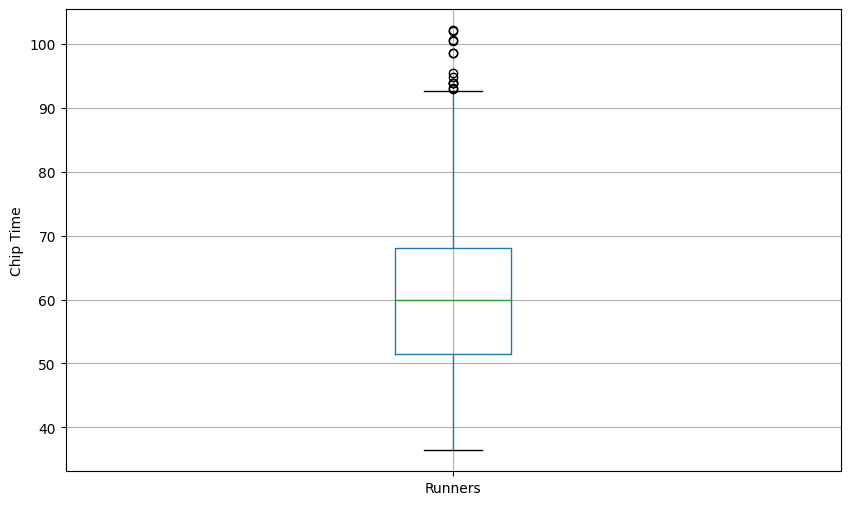

In [291]:
df6.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])


#### Les temps de course des coureurs suivent-ils une distribution normale ?

Afficher une distribution des temps au chronomètre des coureurs 

comment vous trouvez la distribution ?

C:\Users\manel\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


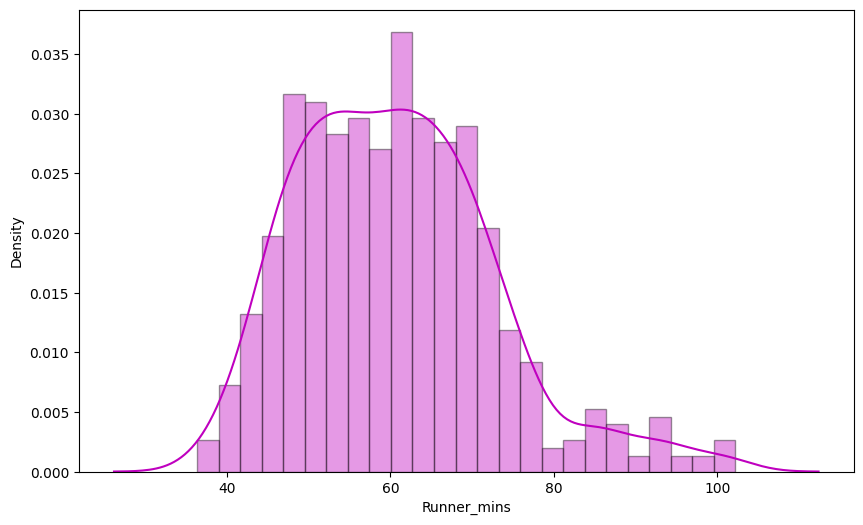

In [292]:
x = df6['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()


#### Ya t-il de différences de performance entre les hommes et les femmes ?

Afficher la distribution des temps au chronomètre pour les hommes et les femmes avec un barchart , un boxplot..

In [293]:
# Création d'une table pivot pour calculer les temps moyens par sexe
mean_times = df6.groupby(' Gender')['Runner_mins'].mean()

mean_times


 Gender
 F    66.743313
 M    58.225314
Name: Runner_mins, dtype: float64

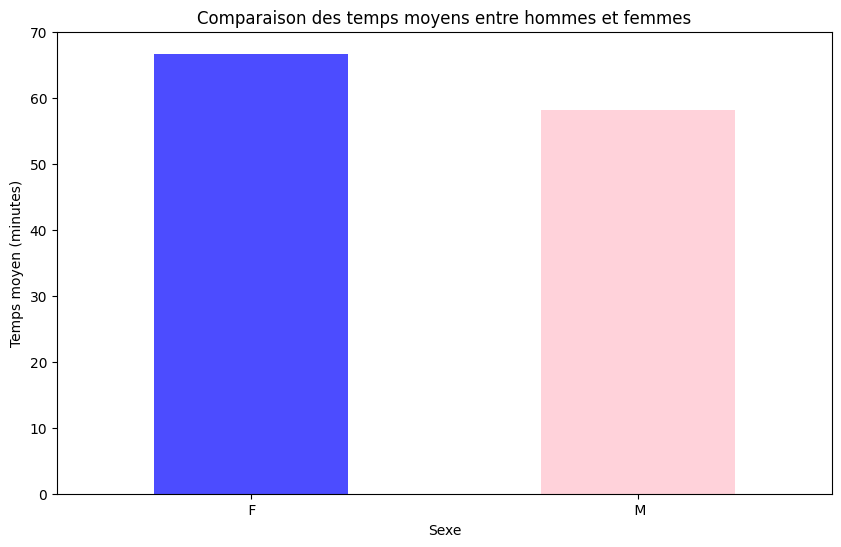

In [294]:
# un bar plot avec matplotlib
mean_times.plot(kind='bar', color=['blue', 'pink'], alpha=0.7)
plt.title('Comparaison des temps moyens entre hommes et femmes')
plt.xlabel('Sexe')
plt.ylabel('Temps moyen (minutes)')
plt.xticks(rotation=0)

#plt.tight_layout()
plt.show()


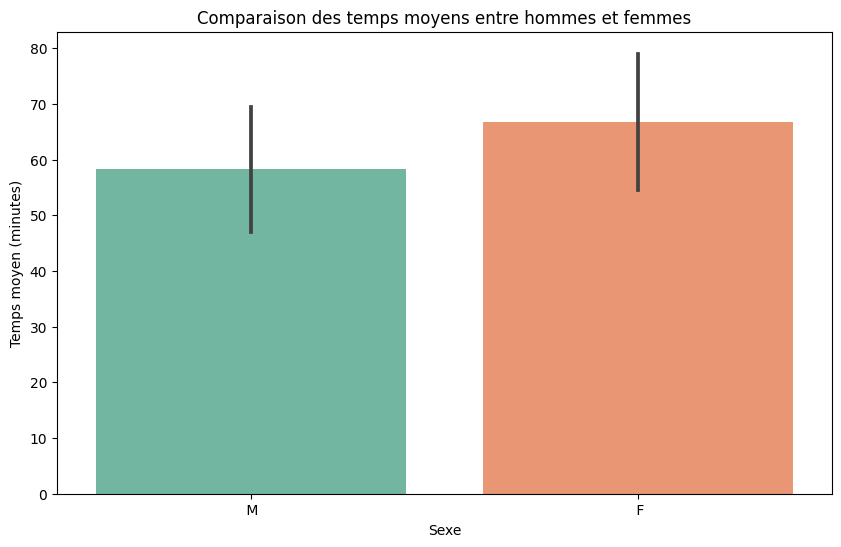

In [296]:
# un Barplot avec Seaborn

sns.barplot(data=df6, x=' Gender', y='Runner_mins', ci='sd', palette='Set2')
plt.title('Comparaison des temps moyens entre hommes et femmes')
plt.xlabel('Sexe')
plt.ylabel('Temps moyen (minutes)')
#plt.tight_layout()
plt.show()



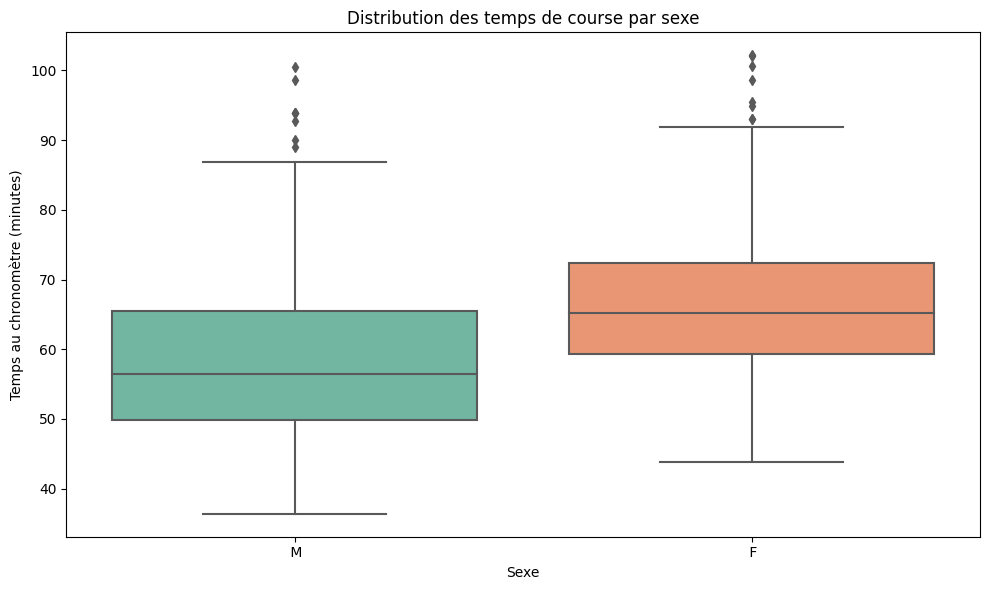

In [297]:
# avec un Boxplot

sns.boxplot(data=df6, x=' Gender', y='Runner_mins', palette='Set2')
plt.title('Distribution des temps de course par sexe')
plt.xlabel('Sexe')
plt.ylabel('Temps au chronomètre (minutes)')
plt.tight_layout()
plt.show()



Text(0.5, 0.98, '')

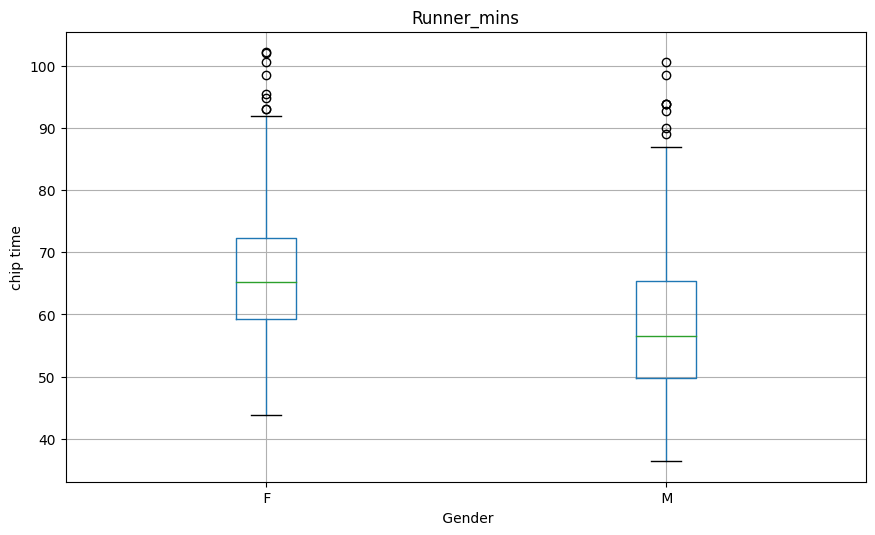

In [308]:
df6.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('chip time')
plt.suptitle("")


In [38]:
# avec un distplot
f_fuko = df6.loc[df6[' Gender']==' F']['Runner_mins']
m_fuko = df6.loc[df6[' Gender']==' M']['Runner_mins']


C:\Users\manel\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\manel\miniconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\manel\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


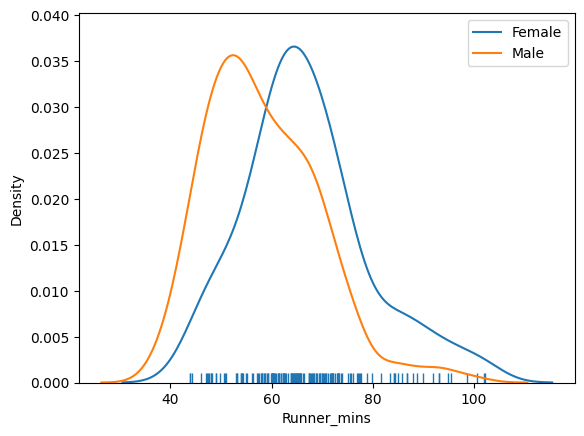

In [45]:
sns.distplot(f_fuko, hist=False, kde=True, rug=True, hist_kws={'edgecolor':'black'}, label='Female')

sns.distplot(m_fuko, hist=False, kde=True, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()


La distribution indique que les femmes sont en moyenne plus lentes que les hommes. 

### des statistiques récapitulatives pour les hommes et les femmes séparément avec .describe()

In [47]:
g_stats = df6.groupby(" Gender", as_index=True).describe()
g_stats


Runner_mins                                                         \
              count       mean        std    min      25%     50%      75%   
 Gender                                                                      
 F            163.0  66.743313  12.287684  43.87  59.2850  65.200  72.3600   
 M            414.0  58.225314  11.170700  36.40  49.7875  56.475  65.4275   

                 
            max  
 Gender          
 F       102.17  
 M       100.53

Le temps moyen au chronomètre pour toutes les femmes est d'environ 66 minutes, tandis que pour les hommes, il est d'environ 58 minutes. 

